<a href="https://colab.research.google.com/github/Himatora/project_analitics/blob/master/%D0%A7%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [1]:
import pandas as pd

Считываем данные

In [2]:
students = pd.read_csv('/content/export studs (1).csv', sep=';',
                      encoding='windows-1251')

In [3]:
attendance = pd.read_csv('/content/Result_2.csv', sep=',',
                      encoding='windows-1251')

In [4]:
students

,Faculty,Faculty_ID,Speciality,Speciality_ID,Group,Student_ID,Birthday,Is_Academic,Discipline_ID,Discipline,Result_ID,Result
0,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,19992,Аварийные режимы в электроэнергетических систе...,3.0,3
1,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,17359,Академическое письмо / Academic Writing,6.0,Зачтено
2,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,20051,Аналоговые и цифровые системы измерений / Anal...,6.0,Зачтено
3,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,20129,Возобновляемые энергоресурсы / Renewable energ...,4.0,4
4,Байкальский институт БРИКС,50,Возобновляемая энергетика / Renewable energy,859,ВЭАм-24,2460979,13.09.2000,0,20229,Защита и управление распределенной генерацией ...,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
465633,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473476,24.07.2000,0,13594,История и философия науки,4.0,4
465634,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473476,24.07.2000,0,22583,Подготовительный этап выполнения научного иссл...,5.0,5
465635,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473479,23.07.2000,0,3254,Иностранный язык,5.0,5
465636,Центр образовательных программ магистратуры и ...,55,Энергетические системы и комплексы,951,аЭНК-24,2473479,23.07.2000,0,13594,История и философия науки,4.0,4


In [7]:
attendance

,id,lesson_id,value,student,created_at,updated_at,user_id,work_id,advertisement_items_ids,discipline_id
0,501,551,1.0,2438882,2024-03-19 05:18:26.965851 +00:00,2024-03-19 05:18:26.965905 +00:00,NaN,NaN,NaN,18
1,506,551,1.0,2433670,2024-03-19 05:18:58.924558 +00:00,2024-03-19 05:18:58.924627 +00:00,NaN,NaN,NaN,18
2,99,42,1.0,2443930,2024-03-12 06:19:27.320665 +00:00,2024-03-12 06:19:27.320716 +00:00,NaN,NaN,NaN,2
3,511,551,NaN,2432303,2024-03-19 05:19:17.082448 +00:00,2024-03-19 05:19:17.551402 +00:00,NaN,NaN,NaN,18
4,516,551,1.0,2434755,2024-03-19 05:19:40.948376 +00:00,2024-03-19 05:19:40.948425 +00:00,NaN,NaN,NaN,18
...,...,...,...,...,...,...,...,...,...,...
1929803,1932134,229538,1.0,2453257,2025-11-13 02:27:40.548338 +00:00,2025-11-13 02:27:40.548359 +00:00,3174.0,NaN,NaN,290
1929804,1932135,226326,1.0,2430390,2025-11-13 02:27:43.650133 +00:00,2025-11-13 02:27:43.650155 +00:00,5499.0,NaN,NaN,1265
1929805,1932136,226326,1.0,2432476,2025-11-13 02:28:04.323727 +00:00,2025-11-13 02:28:04.323750 +00:00,5499.0,NaN,NaN,1265
1929806,1932137,226325,1.0,2432476,2025-11-13 02:28:12.939114 +00:00,2025-11-13 02:28:12.939136 +00:00,5499.0,NaN,NaN,1265


In [5]:
print("Данные до очистки:")
print(f"Размерность: {attendance.shape}")
print(f"Общее количество пропусков: {attendance.isnull().sum().sum()}")

Данные до очистки:
Размерность: (1929808, 10)
Общее количество пропусков: 3436787


In [6]:
print("Данные до очистки:")
print(f"Размерность: {students.shape}")
print(f"Общее количество пропусков: {students.isnull().sum().sum()}")

Данные до очистки:
Размерность: (465638, 12)
Общее количество пропусков: 2


In [8]:
print(f"Исходный размер данных: {students.shape}")

# Проверяем количество пропусков
missing_count = students.isnull().sum().sum()

if missing_count > 0:
    rows_with_missing = students[students.isnull().any(axis=1)]
    print(f"Строки с пропусками: {len(rows_with_missing)}")
    print(rows_with_missing)

# Удаляем строки с пропусками
students_clean = students.dropna()

print(f"Размер данных после удаления строк с пропусками: {students_clean.shape}")
print(f"Пропусков осталось: {students_clean.isnull().sum().sum()}")

Исходный размер данных: (465638, 12)
Строки с пропусками: 1
                                   Faculty  Faculty_ID  \
164730  Институт заочно-вечернего обучения          15   

                                  Speciality  Speciality_ID    Group  \
164730  Автомобили и автомобильное хозяйство            629  ААбз-23   

        Student_ID    Birthday  Is_Academic  Discipline_ID  \
164730     2456219  19.08.1998            0          11272   

                                      Discipline  Result_ID Result  
164730  Введение в профессиональную деятельность        NaN    NaN  
Размер данных после удаления строк с пропусками: (465637, 12)
Пропусков осталось: 0


Обработка данных

ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Общий размер данных: (1929808, 10)
Всего ячеек: 19298080
Пропущенных значений: 3436787
Процент пропусков: 17.81%

АНАЛИЗ ПО СТОЛБЦАМ:
                         Пропуски  Процент Тип данных
work_id                   1925978    99.80    float64
advertisement_items_ids   1508185    78.15     object
value                        1588     0.08    float64
user_id                      1036     0.05    float64
lesson_id                       0     0.00      int64
id                              0     0.00      int64
updated_at                      0     0.00     object
created_at                      0     0.00     object
student                         0     0.00      int64
discipline_id                   0     0.00      int64


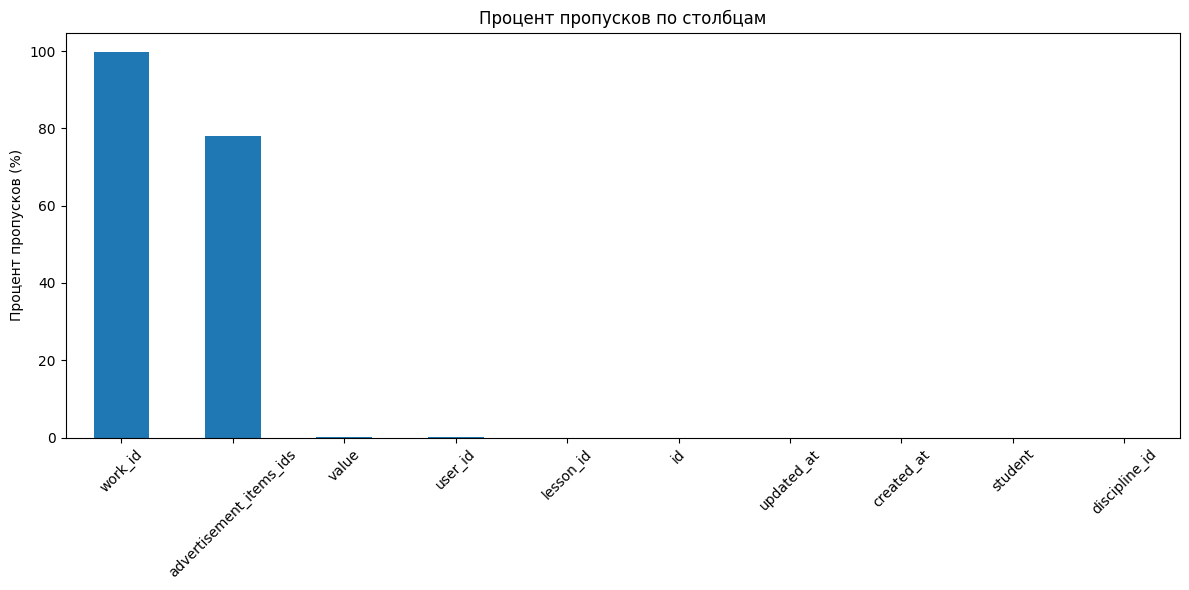


АНАЛИЗ СТРОК:
Строк без пропусков: 414
Строк с хотя бы одним пропуском: 1929394

Распределение пропусков по строкам:
  0 пропусков: 414 строк
  1 пропусков: 424573 строк
  2 пропусков: 1502402 строк
  3 пропусков: 2266 строк
  4 пропусков: 153 строк

ЭКСТРЕМАЛЬНЫЕ СЛУЧАИ:
Полностью пустых строк: 0
Полностью пустых столбцов: 0

Столбцов с >80% пропусков: 1
  work_id: 99.80%

АНАЛИЗ ПАТТЕРНОВ ПРОПУСКОВ:
Корреляции пропусков между столбцами (топ-5 пар):

ТИПЫ ДАННЫХ И ПРОПУСКИ:
Пропусков в числовых столбцах: 1928602
Пропусков в категориальных столбцах: 1508185

РЕКОМЕНДАЦИИ:
Общий процент пропусков: 17.81%
✅ НИЗКИЙ УРОВЕНЬ ПРОПУСКОВ - можно безопасно удалить пропуски

Столбцы-кандидаты на удаление (>80% пропусков):
  - work_id (99.8% пропусков)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 50)

# 1. Общая информация
print(f"Общий размер данных: {attendance.shape}")
print(f"Всего ячеек: {attendance.shape[0] * attendance.shape[1]}")
print(f"Пропущенных значений: {attendance.isnull().sum().sum()}")
print(f"Процент пропусков: {(attendance.isnull().sum().sum() / (attendance.shape[0] * attendance.shape[1]) * 100):.2f}%")

# 2. Анализ по столбцам
print("\n" + "=" * 50)
print("АНАЛИЗ ПО СТОЛБЦАМ:")
print("=" * 50)

missing_by_column = attendance.isnull().sum()
missing_percent_by_column = (missing_by_column / len(attendance)) * 100

missing_df = pd.DataFrame({
    'Пропуски': missing_by_column,
    'Процент': missing_percent_by_column.round(2),
    'Тип данных': attendance.dtypes
})

print(missing_df.sort_values('Пропуски', ascending=False))

# 3. Визуализация пропусков по столбцам
plt.figure(figsize=(12, 6))
missing_percent_by_column.sort_values(ascending=False).plot(kind='bar')
plt.title('Процент пропусков по столбцам')
plt.ylabel('Процент пропусков (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Анализ строк с пропусками
print("\n" + "=" * 50)
print("АНАЛИЗ СТРОК:")
print("=" * 50)

# Количество пропусков в каждой строке
missing_per_row = attendance.isnull().sum(axis=1)
print(f"Строк без пропусков: {(missing_per_row == 0).sum()}")
print(f"Строк с хотя бы одним пропуском: {(missing_per_row > 0).sum()}")

# Распределение количества пропусков по строкам
print("\nРаспределение пропусков по строкам:")
missing_counts = missing_per_row.value_counts().sort_index()
for count, num_rows in missing_counts.head(10).items():
    print(f"  {count} пропусков: {num_rows} строк")

# 5. Анализ полностью пустых строк и столбцов
print("\n" + "=" * 50)
print("ЭКСТРЕМАЛЬНЫЕ СЛУЧАИ:")
print("=" * 50)

# Полностью пустые строки
empty_rows = attendance.isnull().all(axis=1).sum()
print(f"Полностью пустых строк: {empty_rows}")

# Полностью пустые столбцы
empty_cols = attendance.isnull().all(axis=0).sum()
print(f"Полностью пустых столбцов: {empty_cols}")

# Столбцы с очень высоким процентом пропусков
high_missing_cols = missing_percent_by_column[missing_percent_by_column > 80]
print(f"\nСтолбцов с >80% пропусков: {len(high_missing_cols)}")
for col, percent in high_missing_cols.items():
    print(f"  {col}: {percent:.2f}%")

# 6. Паттерны пропусков
print("\n" + "=" * 50)
print("АНАЛИЗ ПАТТЕРНОВ ПРОПУСКОВ:")
print("=" * 50)

# Проверяем, есть ли столбцы, которые пропускаются вместе
# (это может указывать на связанные данные)

# Создаем бинарную матрицу пропусков
missing_matrix = attendance.isnull()

# Считаем корреляции пропусков между столбцами
missing_corr = missing_matrix.corr()

print("Корреляции пропусков между столбцами (топ-5 пар):")
# Находим пары столбцов с высокой корреляцией пропусков
corr_pairs = []
cols = missing_corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if abs(missing_corr.iloc[i, j]) > 0.3:  # порог корреляции
            corr_pairs.append((cols[i], cols[j], missing_corr.iloc[i, j]))

# Сортируем по абсолютному значению корреляции
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for col1, col2, corr in corr_pairs[:5]:
    print(f"  {col1} - {col2}: {corr:.3f}")

# 7. Анализ типов данных в столбцах с пропусками
print("\n" + "=" * 50)
print("ТИПЫ ДАННЫХ И ПРОПУСКИ:")
print("=" * 50)

numeric_missing = attendance.select_dtypes(include=[np.number]).isnull().sum().sum()
categorical_missing = attendance.select_dtypes(include=['object']).isnull().sum().sum()

print(f"Пропусков в числовых столбцах: {numeric_missing}")
print(f"Пропусков в категориальных столбцах: {categorical_missing}")

# 8. Рекомендации по обработке
print("\n" + "=" * 50)
print("РЕКОМЕНДАЦИИ:")
print("=" * 50)

total_cells = attendance.shape[0] * attendance.shape[1]
missing_percentage_total = (attendance.isnull().sum().sum() / total_cells) * 100

print(f"Общий процент пропусков: {missing_percentage_total:.2f}%")

if missing_percentage_total > 50:
    print("❌ ВЫСОКИЙ УРОВЕНЬ ПРОПУСКОВ - требуется тщательный анализ перед удалением")
    print("Рекомендации:")
    print("1. Проанализировать причины пропусков")
    print("2. Рассмотреть удаление столбцов с >80% пропусков")
    print("3. Для оставшихся - использовать интерполяцию/заполнение")
elif missing_percentage_total > 20:
    print("⚠️ СРЕДНИЙ УРОВЕНЬ ПРОПУСКОВ - требуется осторожная обработка")
    print("Рекомендации:")
    print("1. Удалить полностью пустые столбцы")
    print("2. Для частично заполненных - использовать умное заполнение")
else:
    print("✅ НИЗКИЙ УРОВЕНЬ ПРОПУСКОВ - можно безопасно удалить пропуски")

# Дополнительно: анализ конкретных проблемных столбцов
if not high_missing_cols.empty:
    print(f"\nСтолбцы-кандидаты на удаление (>80% пропусков):")
    for col in high_missing_cols.index:
        print(f"  - {col} ({high_missing_cols[col]:.1f}% пропусков)")

In [10]:
# Удаляем столбец work_id
if 'work_id' in attendance.columns:
    attendance = attendance.drop('work_id', axis=1)
    print(f"Столбец 'work_id' удален. Новая размерность данных: {attendance.shape}")
else:
    print("Столбец 'work_id' не найден в данных")
    # Удаляем столбец work_id
if 'advertisement_items_ids' in attendance.columns:
    attendance = attendance.drop('advertisement_items_ids', axis=1)
    print(f"Столбец 'advertisement_items_ids' удален. Новая размерность данных: {attendance.shape}")
else:
    print("Столбец 'advertisement_items_ids' не найден в данных")

Столбец 'work_id' удален. Новая размерность данных: (1929808, 9)
Столбец 'advertisement_items_ids' удален. Новая размерность данных: (1929808, 8)


In [11]:
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 50)

# 1. Общая информация
print(f"Общий размер данных: {attendance.shape}")
print(f"Всего ячеек: {attendance.shape[0] * attendance.shape[1]}")
print(f"Пропущенных значений: {attendance.isnull().sum().sum()}")
print(f"Процент пропусков: {(attendance.isnull().sum().sum() / (attendance.shape[0] * attendance.shape[1]) * 100):.2f}%")

ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Общий размер данных: (1929808, 8)
Всего ячеек: 15438464
Пропущенных значений: 2624
Процент пропусков: 0.02%


Нужна расшифровка данных, т.к. непонятна важность пустых столбцов. Нужно понять, за что отвечает user_id,work_id и value.

In [13]:
# Удаляем строки с любыми пропусками
attendance = attendance.dropna()

print(f"Размер после удаления строк с пропусками: {attendance.shape}")
print(f"Удалено строк: {attendance.shape[0] - attendance.shape[0]}")
print(f"Осталось пропусков: {attendance.isnull().sum().sum()}")

# Проверяем, что действительно нет пропусков
if attendance.isnull().sum().sum() == 0:
    print("✅ Все строки с пропусками успешно удалены!")
else:
    print("⚠️ В данных остались пропуски")

Размер после удаления строк с пропусками: (1927337, 8)
Удалено строк: 0
Осталось пропусков: 0
✅ Все строки с пропусками успешно удалены!


Сохраняем данные

In [14]:
students.to_csv('cleaned_students.csv', index=False, sep=';', encoding='windows-1251')
attendance.to_csv('cleaned_attendance.csv', index=False, sep=';', encoding='windows-1251')

In [15]:
attendance

,id,lesson_id,value,student,created_at,updated_at,user_id,discipline_id
123,3616,1952,1.0,2451037,2024-03-22 06:11:24.319053 +00:00,2024-03-22 06:11:24.319102 +00:00,98.0,64
214,190,23,1.0,2447881,2024-03-13 09:11:36.141218 +00:00,2024-03-22 03:59:11.940877 +00:00,16.0,2
358,197,49,1.0,2442329,2024-03-13 09:12:09.499294 +00:00,2024-03-22 04:00:36.309622 +00:00,16.0,2
371,3617,1952,1.0,2452545,2024-03-22 06:11:25.587612 +00:00,2024-03-22 06:11:25.587660 +00:00,98.0,64
372,200,49,1.0,2442063,2024-03-13 09:12:11.223003 +00:00,2024-03-22 04:00:44.495379 +00:00,16.0,2
...,...,...,...,...,...,...,...,...
1929803,1932134,229538,1.0,2453257,2025-11-13 02:27:40.548338 +00:00,2025-11-13 02:27:40.548359 +00:00,3174.0,290
1929804,1932135,226326,1.0,2430390,2025-11-13 02:27:43.650133 +00:00,2025-11-13 02:27:43.650155 +00:00,5499.0,1265
1929805,1932136,226326,1.0,2432476,2025-11-13 02:28:04.323727 +00:00,2025-11-13 02:28:04.323750 +00:00,5499.0,1265
1929806,1932137,226325,1.0,2432476,2025-11-13 02:28:12.939114 +00:00,2025-11-13 02:28:12.939136 +00:00,5499.0,1265


In [16]:
# Группируем по студенту и предмету
result = attendance.groupby(['student', 'discipline_id']).agg(
    total_lessons=('value', 'count'),  # общее количество занятий
    attended_lessons=('value', lambda x: (x > 0).sum())  # занятия с value > 0
).reset_index()

# Вычисляем процент посещений
result['attendance_percentage'] = round(
    (result['attended_lessons'] / result['total_lessons']) * 100, 2
)

# Сортируем для удобства просмотра
result = result.sort_values(['student', 'discipline_id'])

# Выводим результат
print(result)
print(f"Всего уникальных студентов: {result['student'].nunique()}")
print(f"Всего уникальных предметов: {result['discipline_id'].nunique()}")

# Если нужно сохранить в файл:
result.to_csv('attendance_summary.csv', index=False)

        student  discipline_id  total_lessons  attended_lessons  \
0             0              1              1                 1   
1             0              3              1                 1   
2             0              8              2                 2   
3             0             10              1                 1   
4             0             11              3                 3   
...         ...            ...            ...               ...   
173490  2491981            469              2                 0   
173491  2491986             11              1                 0   
173492  2491986            270              1                 0   
173493  2491986            321              1                 0   
173494  2491986            339              1                 1   

        attendance_percentage  
0                       100.0  
1                       100.0  
2                       100.0  
3                       100.0  
4                       100.0  
...

In [18]:
# Создаем сводную таблицу посещений (как в предыдущем ответе)
attendance_summary = (
    attendance.groupby(['student', 'discipline_id'])
    .agg(
        total_lessons=('value', 'count'),
        attended_lessons=('value', lambda x: (x > 0).sum())
    )
    .reset_index()
)

# Вычисляем процент посещений
attendance_summary['attendance_percentage'] = round(
    (attendance_summary['attended_lessons'] / attendance_summary['total_lessons']) * 100, 2
)

# Объединяем с таблицей студентов
result = pd.merge(
    attendance_summary,
    students[['Student_ID', 'Discipline_ID', 'Is_Academic', 'Result_ID']],
    left_on=['student', 'discipline_id'],
    right_on=['Student_ID', 'Discipline_ID'],
    how='left'  # left join чтобы сохранить все записи из attendance_summary
)

# Удаляем дублирующиеся столбцы после объединения
result = result.drop(['Student_ID', 'Discipline_ID'], axis=1)

# Сортируем результат
result = result.sort_values(['student', 'discipline_id'])

print(result.head())
print(f"\nРазмер итоговой таблицы: {result.shape}")


   student  discipline_id  total_lessons  attended_lessons  \
0        0              1              1                 1   
1        0              3              1                 1   
2        0              8              2                 2   
3        0             10              1                 1   
4        0             11              3                 3   

   attendance_percentage  Is_Academic  Result_ID  
0                  100.0          NaN        NaN  
1                  100.0          NaN        NaN  
2                  100.0          NaN        NaN  
3                  100.0          NaN        NaN  
4                  100.0          NaN        NaN  

Размер итоговой таблицы: (173529, 7)
